## Parte 1: Ver como os dados estão dispostos

In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as  plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
%matplotlib inline

In [3]:
sns.set_style('whitegrid')

In [4]:
train = pd.read_csv('titanic_train.csv')

In [5]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [16]:
train.isnull().head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False


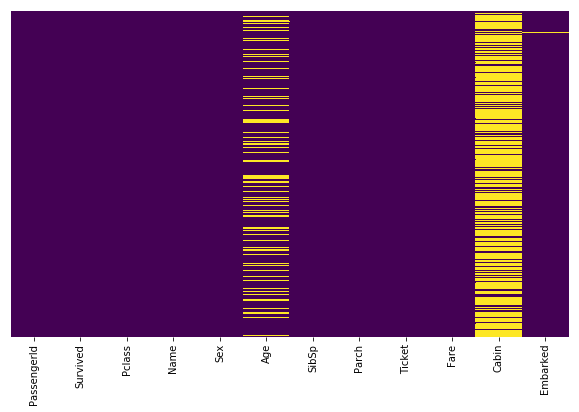

In [22]:
# Saber quais colunas entá faltando dados
plt.figure(figsize=(10, 6))
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='viridis')

## Análise exploratória de dados

Iremos verificar os sobreviventes do naufrágio

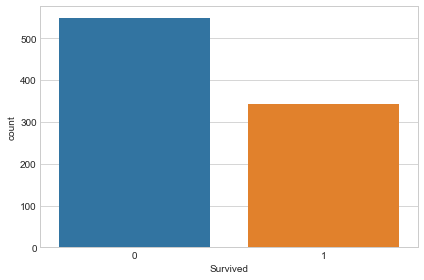

In [26]:
sns.countplot(x='Survived', data=train)
plt.tight_layout()

Iremos verificar os sobreviventes do naufrágio, em relação ao sexo

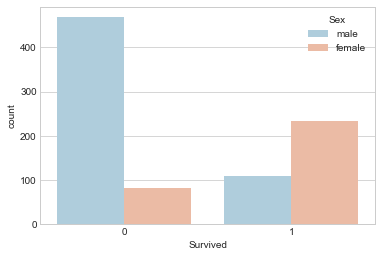

In [31]:
sns.countplot(x='Survived', data=train, hue='Sex', palette='RdBu_r')

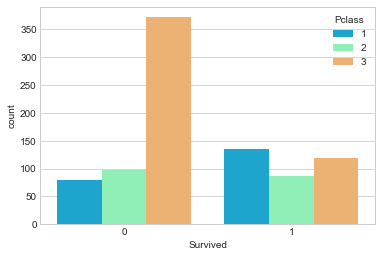

In [33]:
sns.countplot(x='Survived', data=train, hue='Pclass', palette='rainbow')

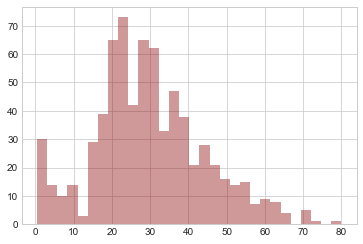

In [35]:
# Veremos como estão dispostas as idades
train['Age'].hist(bins=30, color='darkred', alpha=.4)

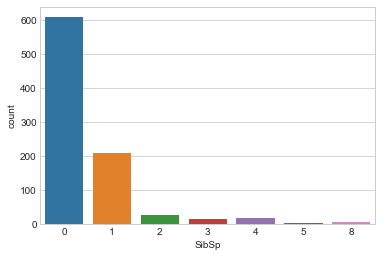

In [36]:
# Saber pessoas que vinheram acompanhados
sns.countplot(x='SibSp', data=train)

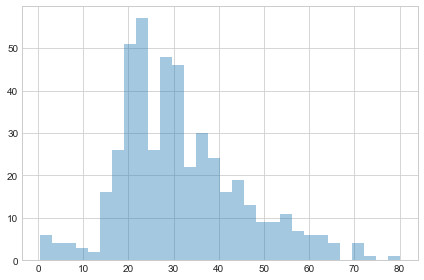

In [51]:
# Saber pessoas que vinheram acompanhados de acordo com as idades
train[train['SibSp']==0]bbb.hist(bins=30, alpha=.4)
plt.tight_layout()

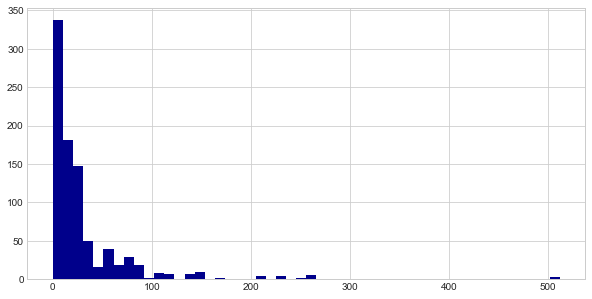

In [55]:
train['Fare'].hist(color='darkblue', bins=50, figsize=(10, 5))

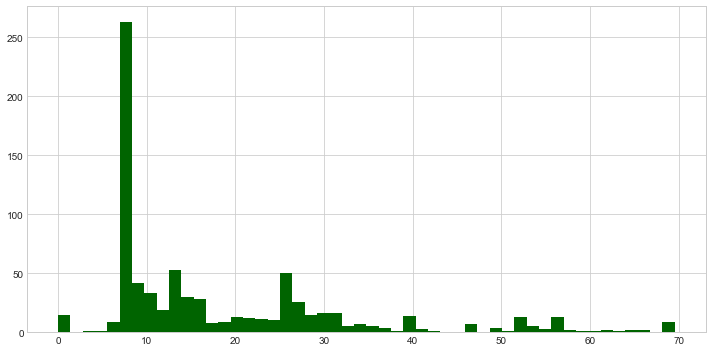

In [60]:
train[train['Fare']<70]['Fare'].hist(color='darkgreen', bins=50, figsize=(10, 5))
plt.tight_layout()

## Parte 2: Iremos tratar alguns dados que estejam faltando pra fazer o modelo ML

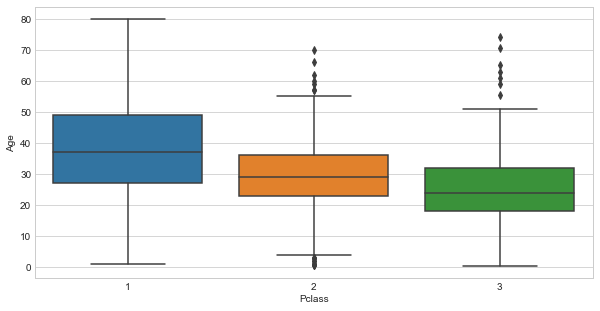

In [62]:
plt.figure(figsize=(10, 5))
sns.boxplot(x='Pclass', y='Age', data=train)

In [63]:
# Temos que preencher as idades faltantes, neste caso iremos preencher com as médias das idades de acordo com as classes

In [5]:
def inputar_idade(cols):
    Idade = cols[0]
    Class = cols[1]
    
    if pd.isnull(Idade):
        if Class == 1:
            return 37
        elif Class == 2:
            return 29
        else:
            return 24
    else:
        return Idade

In [7]:
train['Age'] = train[['Age', 'Pclass']].apply(inputar_idade, axis=1)

In [6]:
train['Age'].head()

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
Name: Age, dtype: float64

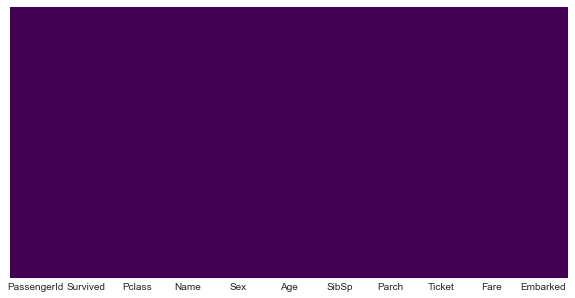

In [15]:
plt.figure(figsize=(10, 5))
sns.heatmap(data=train.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [9]:
del train['Cabin']

In [14]:
train.dropna(inplace=True) # apaga as linhas que possui qualquer tipo de dados falsos, ou seja, linhas sem dados.

Trabalhando com dados categóricos

In [17]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


Vamos transformar os dados categóricos em numericos, para melhorar o dataset.

**Neste Caso percebemos que as únicas colunas de dados categóricos que é possível as transformações é a coluna Sex e Embark, pois é podemos encontrar padronização entre os dados, portanto, as colunas Name e Ticket por possuirem diferentes tipos de dados não é consideravel efetuar algum tipo de modificação.**

In [21]:
sex = pd.get_dummies(train['Sex'], drop_first=True)

In [26]:
embark = pd.get_dummies(train['Embarked'], drop_first=True)

**Agora iremos apagar as colunas que não serão relevantes para a elaboração do modelo ML**

In [27]:
train.drop(train[['Sex', 'PassengerId', 'Name', 'Ticket']], axis=1, inplace=True)

In [29]:
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked
0,0,3,22.0,1,0,7.2500,S
1,1,1,38.0,1,0,71.2833,C
2,1,3,26.0,0,0,7.9250,S
3,1,1,35.0,1,0,53.1000,S
4,0,3,35.0,0,0,8.0500,S


In [30]:
train = pd.concat([train, sex, embark], axis=1)

In [32]:
del train['Embarked']

In [33]:
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


### Codificando o modelo ML

In [39]:
# Os valores de X serão todas as colunas, exceto a coluna Survived
# Os valores de y serão apenas da coluna Survived
X_train, X_test, y_train, y_test = train_test_split(train.drop('Survived', axis=1), train['Survived'], test_size=0.3)

In [42]:
logmodel = LogisticRegression()

In [43]:
logmodel.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [48]:
predictions = logmodel.predict(X_test)

In [50]:
print(classification_report(y_test, predictions))

             precision    recall  f1-score   support

          0       0.79      0.85      0.82       155
          1       0.77      0.69      0.73       112

avg / total       0.78      0.78      0.78       267



In [58]:
print(confusion_matrix(y_test, predictions))

[[132  23]
 [ 35  77]]
